In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [5]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


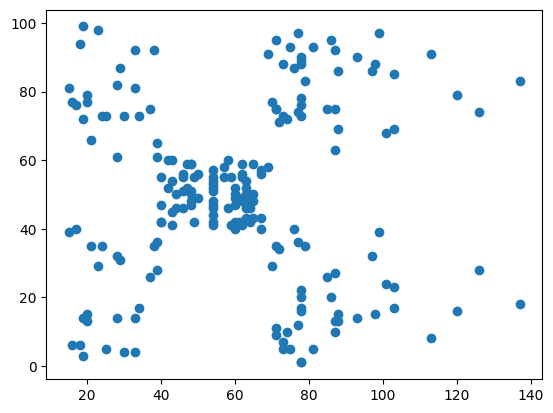

In [9]:
plt.scatter(data["Annual Income (k$)"],data["Spending Score (1-100)"])

In [19]:
k_rng = range(1,11)
sse = []
for k in k_rng:
  km = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state= 42)
  km.fit(data[["Annual Income (k$)","Spending Score (1-100)"]])
  sse.append(km.inertia_)

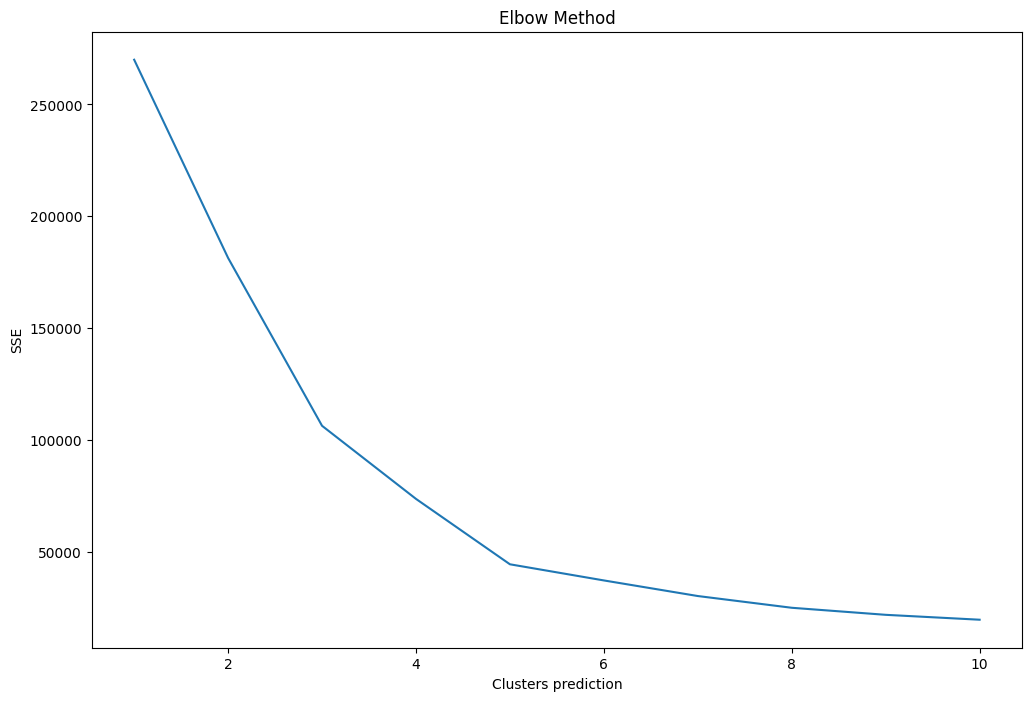

In [21]:
plt.figure(figsize=(12,8))
plt.plot(range(1,11),sse)
plt.title("Elbow Method")
plt.xlabel("Clusters prediction")
plt.ylabel("SSE")
plt.show()

In [23]:
cluster_pred = 5
km = KMeans(n_clusters=cluster_pred, init='k-means++', n_init=10, random_state= 42)
cluster=km.fit_predict(data[["Annual Income (k$)","Spending Score (1-100)"]])
data["Cluster"]=cluster
cluster

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

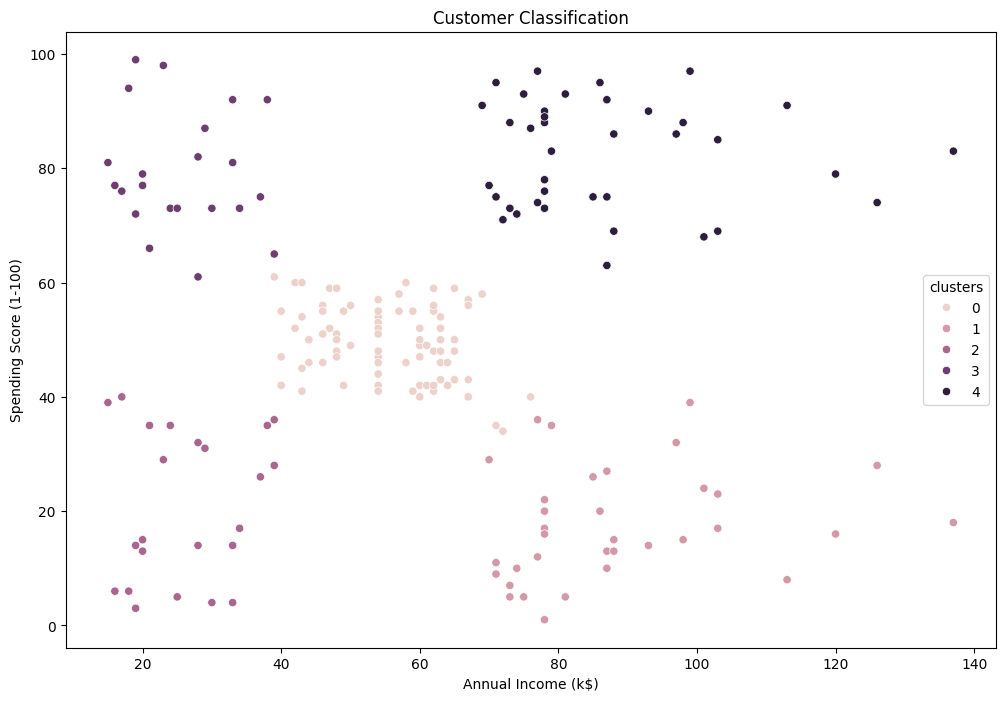

In [27]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",hue="Cluster",data=data)
plt.title("Customer Classification")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="clusters")
plt.show()